#Numerical Methods UNAL 2021-I

Lab 1. Quantopian Lectures. Lecture 6. Central Tendency.

*Andres Alejandro Bonilla Duarte*. aabonillad@unal.edu.co

# Measures of Central Tendency
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)


---

In this notebook we will discuss ways to summarize a set of data using a single number. The goal is to capture information about the distribution of data.

# Arithmetic mean

The arithmetic mean is used very frequently to summarize numerical data, and is usually the one assumed to be meant by the word "average." It is defined as the sum of the observations divided by the number of observations:
$$\mu = \frac{\sum_{i=1}^N X_i}{N}$$

where $X_1, X_2, \ldots , X_N$ are our observations.



---

# Uso del Ecosistema Cientifico de Python
* Colab
* Numpy
* Scypy

medidas de tendencia central

In [ ]:
# Two useful statistical libraries
import scipy.stats as stats
import numpy as np

# We'll use these two data sets as examples
x1 = [1, 2, 2, 3, 4, 5, 5, 7]
x2 = x1 + [100]

print 'Mean of x1:', sum(x1), '/', len(x1), '=', np.mean(x1)
print 'Mean of x2:', sum(x2), '/', len(x2), '=', np.mean(x2)

Mean of x1: 29 / 8 = 3.625
Mean of x2: 129 / 9 = 14.3333333333


In [ ]:
# import libraries
import scipy.stats as stats
import numpy as np

In [ ]:
# Dataset demo NM class example
data0 = [2, 4, 6, 8, 9]
data1 = data0 + [100000]
data2 = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
print(data0)
print('mean data0', np.mean(data0))
print(data1)
print('mean data1', np.mean(data1))
print('mean data2', np.mean(data2))

[2, 4, 6, 8, 9]
mean data0 5.8
[2, 4, 6, 8, 9, 100000]
mean data1 16671.5
mean data2 4.5


We can also define a <i>weighted</i> arithmetic mean, which is useful for explicitly specifying the number of times each observation should be counted. For instance, in computing the average value of a portfolio, it is more convenient to say that 70% of your stocks are of type X rather than making a list of every share you hold.

The weighted arithmetic mean is defined as
$$\sum_{i=1}^n w_i X_i $$

where $\sum_{i=1}^n w_i = 1$. In the usual arithmetic mean, we have $w_i = 1/n$ for all $i$.

In [ ]:
# weighted mean method
def weightedMean(values, weights):
  wmean = 0
  i = 0
  for v in values:
    w = weights[i]
    wmean += v * w
    i += 1
    #print(v, w, wmean)
  return wmean

myValues = [3, 5, 4, 1.6, 5 ,5]
myWeights = [0.2, 0.2, 0.15, 0.15, 0.1, 0.2]
wm = weightedMean(myValues, myWeights)
print(wm)

3.9400000000000004


# Median

The median of a set of data is the number which appears in the middle of the list when it is sorted in increasing or decreasing order. When we have an odd number $n$ of data points, this is simply the value in position $(n+1)/2$. When we have an even number of data points, the list splits in half and there is no item in the middle; so we define the median as the average of the values in positions $n/2$ and $(n+2)/2$.

The median is less affected by extreme values in the data than the arithmetic mean. It tells us the value that splits the data set in half, but not how much smaller or larger the other values are.

In [ ]:
print 'Median of x1:', np.median(x1)
print 'Median of x2:', np.median(x2)

In [ ]:
print('median data0', np.median(data0))
print('median data1', np.median(data1))
print('median data2', np.median(data2))

median data0 6.0
median data1 7.0
median data2 4.5


# Mode

The mode is the most frequently occuring value in a data set. It can be applied to non-numerical data, unlike the mean and the median. One situation in which it is useful is for data whose possible values are independent. For example, in the outcomes of a weighted die, coming up 6 often does not mean it is likely to come up 5; so knowing that the data set has a mode of 6 is more useful than knowing it has a mean of 4.5.

In [ ]:
# Scipy has a built-in mode function, but it will return exactly one value
# even if two values occur the same number of times, or if no value appears more than once
print 'One mode of x1:', stats.mode(x1)[0][0]

# So we will write our own
def mode(l):
    # Count the number of times each element appears in the list
    counts = {}
    for e in l:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
            
    # Return the elements that appear the most times
    maxcount = 0
    modes = {}
    for (key, value) in counts.items():
        if value > maxcount:
            maxcount = value
            modes = {key}
        elif value == maxcount:
            modes.add(key)
            
    if maxcount > 1 or len(l) == 1:
        return list(modes)
    return 'No mode'
    
print 'All of the modes of x1:', mode(x1)

One mode of x1: 2
All of the modes of x1: [2, 5]


In [ ]:
# return the modes of a list with multiple modes
def mode(mylist):
  count = {}
  for e in mylist:
    if e in count:
      count[e] += 1
    else:
      count[e] = 1
    
  modes = {}
  maxcount = 0
  for (key, value) in count.items():
    if value > maxcount:
      maxcount = value
      modes = {key}
    elif maxcount == value:
      modes.add(key)
      
  if len(mylist) == 1 or maxcount > 1:
    return list(modes)
  return 'no modes...'

In [ ]:
print(mode(data0))
print(mode(data1))
print(mode([1,1,1,3,3,3,2,4,5,6]))

no modes...
no modes...
[1, 3]


For data that can take on many different values, such as returns data, there may not be any values that appear more than once. In this case we can bin values, like we do when constructing a histogram, and then find the mode of the data set where each value is replaced with the name of its bin. That is, we find which bin elements fall into most often.

In [ ]:
# Get return data for an asset and compute the mode of the data set
start = '2014-01-01'
end = '2015-01-01'
pricing = get_pricing('SPY', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]
print 'Mode of returns:', mode(returns)

# Since all of the returns are distinct, we use a frequency distribution to get an alternative mode.
# np.histogram returns the frequency distribution over the bins as well as the endpoints of the bins
hist, bins = np.histogram(returns, 20) # Break data up into 20 bins
maxfreq = max(hist)
# Find all of the bins that are hit with frequency maxfreq, then print the intervals corresponding to them
print 'Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq]

Mode of returns: No mode
Mode of bins: [(-0.001330629195540084, 0.00097352774911502182)]


Definimos una lista con datos no repetidos, el objetivo es encontrar, usando np.histogram, el bin en donde están representados mas elementos de la lista.

In [ ]:
# np.histogram return dos listas
# hist contiene el numero de ocurrencias en cada bin
# bins contiene los intervalos que constituyen los bin
data3 = [0, 1, 1.1, 1.11, 1.2, 1.14, 2, 3, 4, 5]
hist, bins = np.histogram(data3)
maxfreq = max(hist)
# muestra el intervalo en donde se encuentra el mayor numero de ocurrencias
[(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq]

[(1.0, 1.5)]

# Geometric mean

While the arithmetic mean averages using addition, the geometric mean uses multiplication:
$$ G = \sqrt[n]{X_1X_1\ldots X_n} $$

for observations $X_i \geq 0$. We can also rewrite it as an arithmetic mean using logarithms:
$$ \ln G = \frac{\sum_{i=1}^n \ln X_i}{n} $$

The geometric mean is always less than or equal to the arithmetic mean (when working with nonnegative observations), with equality only when all of the observations are the same.

In [ ]:
# Use scipy's gmean function to compute the geometric mean
print 'Geometric mean of x1:', stats.gmean(x1)
print 'Geometric mean of x2:', stats.gmean(x2)

Geometric mean of x1: 3.09410402498
Geometric mean of x2: 4.55253458762


In [ ]:
print('geometric mean data0:', stats.gmean(data0))
print('geometric mean data1:', stats.gmean(data1))
print('geometric mean data2:', stats.gmean(data2))

geometric mean data0: 5.101698002503164
geometric mean data1: 26.490833455576446
geometric mean data2: 0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


What if we want to compute the geometric mean when we have negative observations? This problem is easy to solve in the case of asset returns, where our values are always at least $-1$. We can add 1 to a return $R_t$ to get $1 + R_t$, which is the ratio of the price of the asset for two consecutive periods (as opposed to the percent change between the prices, $R_t$). This quantity will always be nonnegative. So we can compute the geometric mean return,
$$ R_G = \sqrt[T]{(1 + R_1)\ldots (1 + R_T)} - 1$$

In [ ]:
# Add 1 to every value in the returns array and then compute R_G
ratios = returns + np.ones(len(returns))
R_G = stats.gmean(ratios) - 1
print 'Geometric mean of returns:', R_G

Geometric mean of returns: 0.000540898532267


In [ ]:
ratios = data1 + np.ones(len(data1))
stats.gmean(ratios) - 1

30.326078019949826

The geometric mean is defined so that if the rate of return over the whole time period were constant and equal to $R_G$, the final price of the security would be the same as in the case of returns $R_1, \ldots, R_T$.

In [ ]:
T = len(returns)
init_price = pricing[0]
final_price = pricing[T]
print 'Initial price:', init_price
print 'Final price:', final_price
print 'Final price as computed with R_G:', init_price*(1 + R_G)**T

Initial price: 179.444
Final price: 205.53
Final price as computed with R_G: 205.53


# Harmonic mean

The harmonic mean is less commonly used than the other types of means. It is defined as
$$ H = \frac{n}{\sum_{i=1}^n \frac{1}{X_i}} $$

As with the geometric mean, we can rewrite the harmonic mean to look like an arithmetic mean. The reciprocal of the harmonic mean is the arithmetic mean of the reciprocals of the observations:
$$ \frac{1}{H} = \frac{\sum_{i=1}^n \frac{1}{X_i}}{n} $$

The harmonic mean for nonnegative numbers $X_i$ is always at most the geometric mean (which is at most the arithmetic mean), and they are equal only when all of the observations are equal.

In [ ]:
print 'Harmonic mean of x1:', stats.hmean(x1)
print 'Harmonic mean of x2:', stats.hmean(x2)

Harmonic mean of x1: 2.55902513328
Harmonic mean of x2: 2.86972365624


In [ ]:
# calculo de media harmonica
print(stats.hmean(data0))
print(stats.hmean(data1))
print(stats.hmean(data2))

4.337349397590362
5.204774127260583
0.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

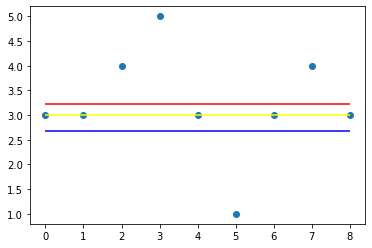

In [ ]:
# data and it's means

mydata = [3, 3, 4, 5, 3, 1, 3, 4, 3]

plt.scatter(list(range(len(mydata))), mydata)
plt.hlines([np.mean(mydata), stats.hmean(mydata), stats.gmean(mydata)], 0, 8, ['red', 'blue', 'yellow'])

The harmonic mean can be used when the data can be naturally phrased in terms of ratios. For instance, in the dollar-cost averaging strategy, a fixed amount is spent on shares of a stock at regular intervals. The higher the price of the stock, then, the fewer shares an investor following this strategy buys. The average (arithmetic mean) amount they pay for the stock is the harmonic mean of the prices.

# Point Estimates Can Be Deceiving

Means by nature hide a lot of information, as they collapse entire distributions into one number. As a result often 'point estimates' or metrics that use one number, can disguise large programs in your data. You should be careful to ensure that you are not losing key information by summarizing your data, and you should rarely, if ever, use a mean without also referring to a measure of spread.

## Underlying Distribution Can be Wrong

Even when you are using the right metrics for mean and spread, they can make no sense if your underlying distribution is not what you think it is. For instance, using standard deviation to measure frequency of an event will usually assume normality. Try not to assume distributions unless you have to, in which case you should rigourously check that the data do fit the distribution you are assuming.

## References
* "Quantitative Investment Analysis", by DeFusco, McLeavey, Pinto, and Runkle

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*